# Chi Squared Test

Some Motivation

If we roll a die, we have 1/6 chance of getting any number. 

Therefore, if we roll a die many times, we would expect each number to appear an equal number of times, i.e. a uniform distribution. 

For example:

the following code simulates rolling a die. Try running it multiple times - you may be getting a different number between 1 and 6 each time.

In [10]:
sample(1:6, 1, replace = TRUE)

[1] 4

Did any number appear more often than others? Did every number appear the same amount of times, like we expected? 

If we want to simulate, we can increase the number of values as so: 

In [18]:
sample(1:6, 120, replace=TRUE)

[1] 3 4 5 4 1 4 5 6 6 2 2 5 6 4 2 6 4 6 5 4 5 4 2 5 2 4 2 6 3 5 6 2 5 2 3 2 5
 [38] 1 2 4 1 2 1 4 3 6 6 1 2 5 1 1 1 1 1 4 2 4 2 6 1 6 1 5 3 4 5 5 5 4 4 3 3 3
 [75] 3 3 1 4 3 6 1 4 1 4 5 2 5 5 3 1 1 5 4 2 6 2 3 3 5 5 2 2 2 6 6 1 6 5 5 2 3
[112] 6 6 2 5 3 1 6 3 1

However, for this example, we will generate our own counts, using `rep`.

This repeats the numbers:
 * 1 - 20 times
 * 2 - 20 times
 * 3 - 19 times
 * etc.
 
Simulating, the number of times that number was rolled in 120 dice rolls. 

In [17]:
(diceroll <- rep(1:6, c(20, 20, 19, 15, 13, 12)))

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5
[77] 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6

Now, we want to know, how many times each number was rolled. We don't want to manually count, so `R` has a function called `table`, which counts the number of each occurence and tallies its frequency. 

In [25]:
observed = table(diceroll)  # counts of each dice roll
observed

diceroll
 1  2  3  4  5  6 
20 20 19 15 13 12 

These are our *observed* dice rolls. If we expected it to be equal for each value, then in 120 dice rolls, we would expect each number to appear 120/6 = 20 times. Looking at our observed counts, can we say that each value appeared approximately this many times? 

We can use a chi-squared test to determine this. Simply, it is looking at the difference between our observed counts and our expected counts. 

`TODO` Ryan, will explain the math. 

In [27]:
# dice = 1:6
# expected = rbind(dice, rep(20, 6))
expected = rep(20, 6) 
expected  # we expect each number to appear 20 times

[1] 20 20 20 20 20 20

The steps to calculating the chi-squared:

1. Observed - Expected
2. We only want the distance, i.e. how far away the observed counts are from the expected counts, therefore we square it, to account for the negatives.
3. Divide it by the expected counts, basically to scale the value.
4. We sum this all together so that we get a single statistic value.

$$\chi^2 = \sum \frac{(o-e)^2}{e}$$

In [29]:
# 1. 
(diff = observed - expected)

diceroll
 1  2  3  4  5  6 
 0  0 -1 -5 -7 -8 

In [30]:
#2. square it
(diff_sq = diff^2)

diceroll
 1  2  3  4  5  6 
 0  0  1 25 49 64 

In [31]:
#3. divide by expected counts
(diff_sq_e = diff_sq/expected)

diceroll
   1    2    3    4    5    6 
0.00 0.00 0.05 1.25 2.45 3.20 

In [33]:
#4. Sum it all together, to get chi-statistic
(chi_stat = sum(diff_sq_e))

[1] 6.95

We have a $\chi^2$ statistic! But what does that mean? 

Notice that if we have exactly 20 counts for each number in our observed, that would mean that we would a difference from the expected of 0, and following that through, the chi-squared would be 0. 

Dealing with randomness though, this will be very unlikely. So, we want to know whether our value is close enough to 0, to suggest that this is still equal to our expected, or if it is far away, to suggest that we might have a biased die. 

This brings in hypothesis testing. 

We want to compare our value to what it would be if it equalled our expected. 

We formalise this as such:

$H_0$: Null Hypothesis - There is no difference between our observed counts and our expected counts

$H_1$: Alternative Hypothesis - There is a difference between our observed and expected counts

To observe this, we can do a simulation (by permutation). We look at the probability of observing our `chi_stat`, when we assume that the null hypothesis is true (i.e. the die is fair and we should be seeing our expected counts). 

In [34]:
# Simulate the chi-squared values we would get if the die was fair:
# we can use the `sample` from the beginning
sample(1:6, 120, replace=TRUE)
# this is for a 'fair' die. 
# Calculate the chisq for this set of observations. Compare that with our observed.
# But is that enough? We want many of these to compare ours against so that we are more confident with our conclusion. 

[1] 5 3 3 3 1 6 5 2 3 2 4 5 2 3 3 4 1 2 5 6 6 5 1 6 2 6 5 2 5 2 1 5 2 3 5 4 6
 [38] 4 4 5 5 6 5 5 5 5 1 1 1 6 6 3 6 4 3 6 2 6 3 5 3 4 5 6 6 6 5 3 5 3 2 6 6 5
 [75] 5 6 1 6 4 2 2 3 3 1 2 1 5 3 5 3 5 4 4 5 1 3 2 5 1 6 1 2 6 4 6 1 3 5 3 3 2
[112] 1 3 5 2 3 3 2 3 2

In [38]:
# To do this many times, we can use the `replicate` function
replicate(10, sample(1:6, 120, replace=TRUE))

## each rown is the 120 dice rolls, each column is how many times we've repeated this. 

4,3,6,5,2,4,4,6,2,3
6,4,5,2,6,4,4,4,4,2
1,6,5,6,2,5,4,1,6,6
4,5,3,2,3,5,6,5,1,3
2,5,1,2,6,3,5,4,6,6
4,3,1,2,4,2,1,5,3,1
4,1,3,5,1,1,1,5,4,5
2,1,1,5,5,3,6,6,6,1
1,6,5,2,2,4,3,6,3,1
6,6,1,2,1,5,6,1,1,1
6,5,2,6,3,2,3,5,6,5


`TODO` explain the expected?

In [45]:
# inside the replicate function, is all the steps we did above to get the chisq stat

chisq_sim <- replicate(1000, {
    rolls = sample(1:6, 120, replace=TRUE) # get 120 dice rolls
    o = table(rolls) # tabulate the counts for each of the values
    e = rep(20, 6) # the expected counts (20 each)
    chisq = sum((o-e)^2/e) # calculate the chisq statistic
})

In [48]:
# look at those values
head(chisq_sim, n=20)
# these are all the chisq values for each of the simulations

[1]  6.4  6.8  6.8  5.9  2.9  3.4  4.7 14.5  0.8  4.1  4.2  2.6 17.3 11.2  1.4
[16]  1.6 14.3  0.5 10.5  3.9

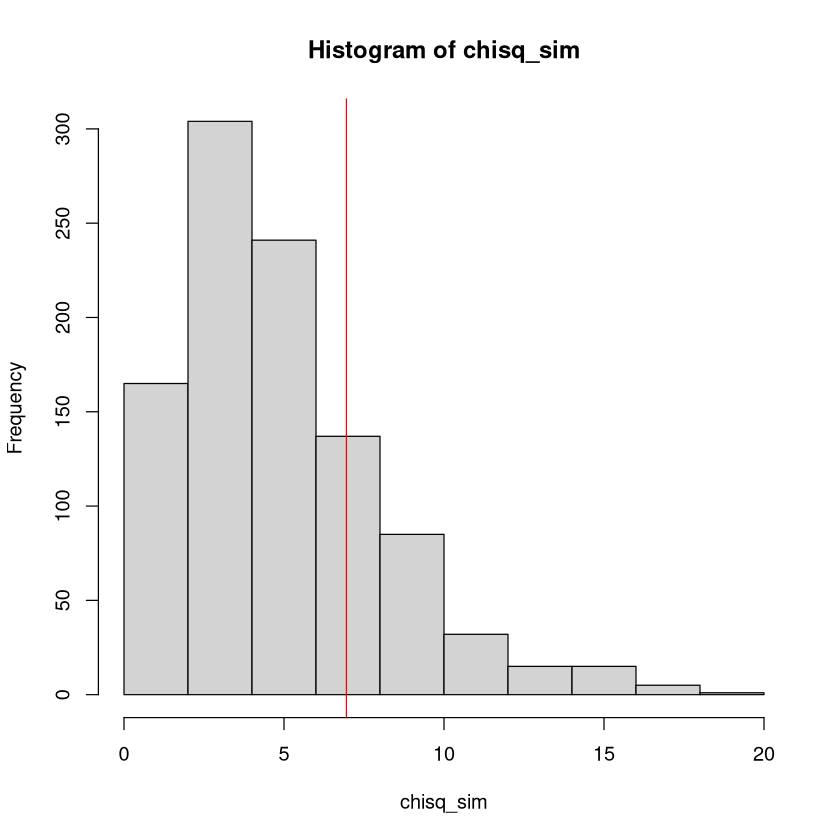

In [51]:
# visualising it:
hist(chisq_sim)

# our original observed statistic
abline(v=chi_stat, col="red")

These values are the chi-squared statistics for the simulation, where we *know* that the die is fair, and therefore any deviation from the expected value is just due to chance.

How likely is it that our observed value, only happened by chance and not because it was an unfair die? 

We can look at how extreme our observed was from the simulated:

In [54]:
# counting how many of the simulations were more extreme than our observed.
mean(chisq_sim > chi_stat)

[1] 0.215

We just calculated a p-value. 

The famous p < 0.05? 

This is the usually accepted threshold, where we can say that if p < 0.05, then there is a small probability that the observed happened by chance, therefore we can reject the null hypothesis. 

In this case, the probability is still relatively high that it occured by chance (i.e. the difference from the expected probably happened by chance and we cannot suggest that it was the the die was unfair. 

We say -- we have no evidence to reject the null hypothesis. 

---

Another way we can do this is using a confidence interval. 

In [55]:
# bootstrap from the sample
# TODO explain bootstrapping
diceroll

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5
[77] 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6

In [80]:
a = rep(1:6, c(20, 20, 20, 20, 20, 20))

In [81]:
bootsim <- replicate(1000, {
   # sample from *our* sample, with replacement. #TODO explain replacement
    samp <- sample(a, replace=TRUE)  # TODO a for diceroll
    # calculate the chisq as before
    o <- table(samp)
    e <- rep(20,6)  # TODO in this case the expected is different, but note in other examples it can change
    chisq <- sum((o-e)^2/e) 
})


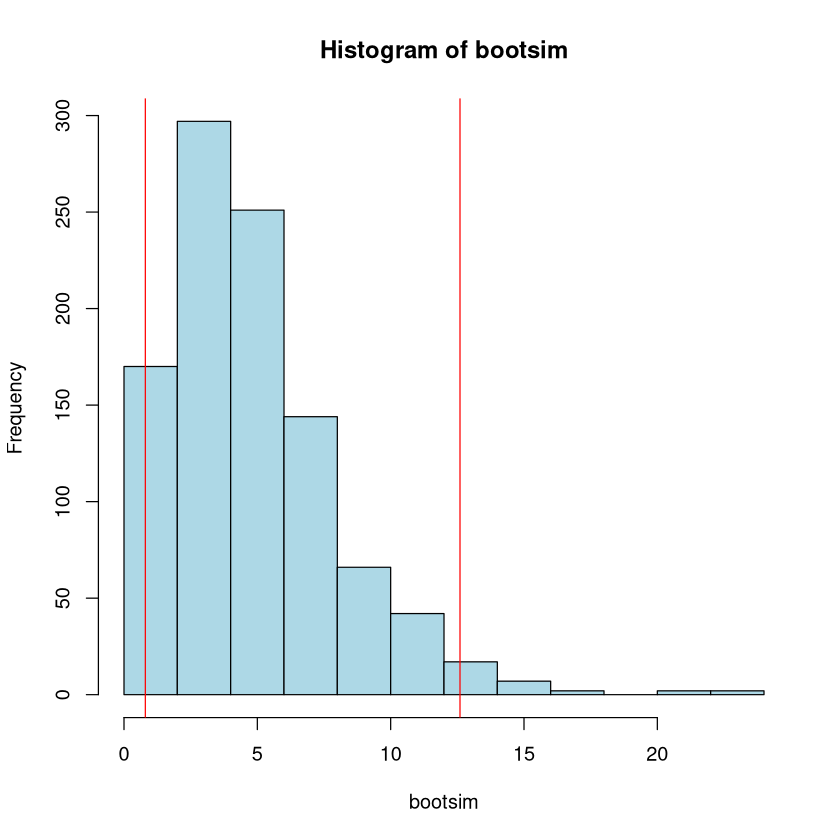

In [82]:
hist(bootsim, col="lightblue")
abline(v=quantile(bootsim, c(0.025, 0.975)), col="red")

In [83]:
quantile(bootsim, c(0.025, 0.975))

# TODO I am wrong about the bootstrapping for chisq.

2.5% 97.5% 
  0.8  12.6

------

## Chi-squared test for independence

If we want to see whether two variables are independent from each other, we can also use a chi-squared test. 

For example, if we want to see whether the appearance of pokemon is independent of the environment i.e. this dataset:

In [86]:
forest = c("Pikachu"=54, "Squirtle"=23)
beach = c("Pikachu"=30, "Squirtle"=49)
(pokemon = rbind(forest, beach))

,Pikachu,Squirtle
forest,54,23
beach,30,49


In this example, if the variables were independent, then we would expect that the land doesn't affect how many of each pokemon we would see, and we would expect them to be equal for each land. 

Calculating the expected counts. This is different to the just knowing the 20, it would depend on

In [108]:
landcount <- rowSums(pokemon)
speciescount <- colSums(pokemon)

# TODO explain this
(expectedcount <- outer(landcount, speciescount) / sum(pokemon))

,Pikachu,Squirtle
forest,41.46154,35.53846
beach,42.53846,36.46154


In [121]:
(e_prob <- expectedcount / landcount)
# notice that when we look at the proportions, we expect to see pikachu equally in forest and beach and same with squirtle

,Pikachu,Squirtle
forest,0.5384615,0.4615385
beach,0.5384615,0.4615385


In [132]:
# calculate the chisq distance
(poke_chisq <- sum(((pokemon - expectedcount)^2)/expectedcount))

[1] 16.22306

In [128]:
pokesim <- replicate(1000, {
    sim <- rmultinom(1, sum(pokemon), e_prob)  # TODO.. explain this.
    o <- matrix(sim, 2, 2)
    e <- outer(rowSums(o), colSums(o))/sum(o)
    chisq <- sum((o-e)^2 / e)
})

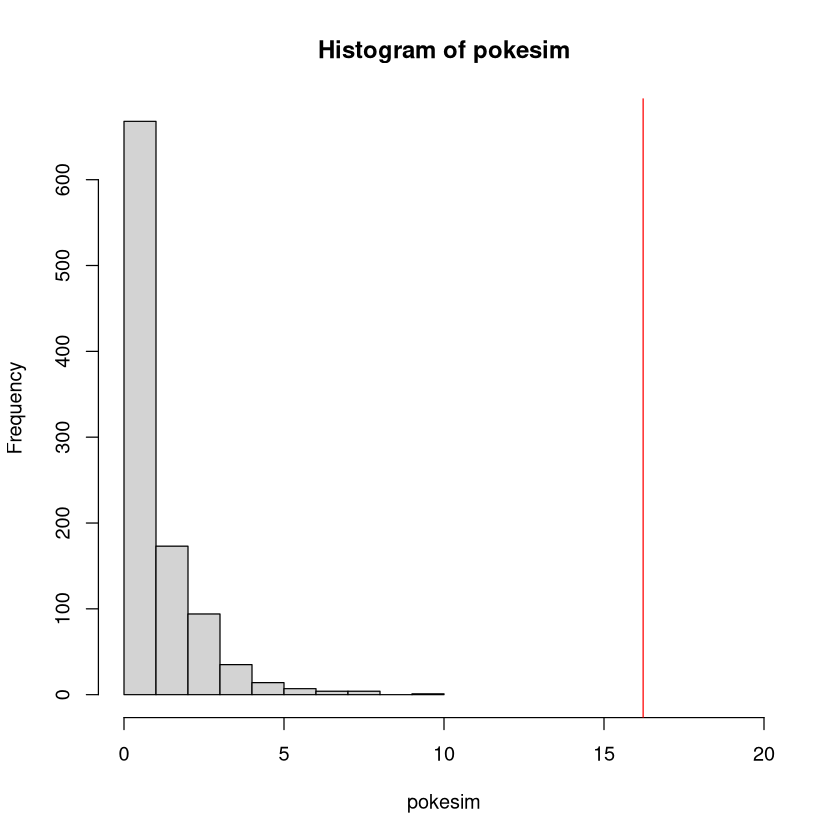

In [134]:
hist(pokesim, xlim=c(0, 20))
abline(v=poke_chisq, col="red")

In [135]:
mean(pokesim > poke_chisq)

[1] 0

`TODO` explain + formalise hypothesis test. 

There is a very small probability that the observations we saw were by chance. not independent/

---

Bootstrapping for a confidence interval

In [139]:
(proppokemon = prop.table(pokemon))

,Pikachu,Squirtle
forest,0.3461538,0.1474359
beach,0.1923077,0.3141026


In [143]:
# sample from there with those proportions

sample(pokemon)

[1] 54 30 23 49

------